Regerssion  : Y = MX + B 

    M = Slop 
    B = Intercept

M = ((mean(x) * mean(y) - mean(x * y)) / (mean(x))**2 - mean(x**2))

B = mean(y) - m * mean(x)

    co-efficient of determiniation = r^2

r^2 = 1 - (SE Y^ / SE mean(y))  (or)  r^2 = 1 - (squared error of regression / squared error of mean )


squared error of regression = https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('ggplot')

In [2]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [3]:
def best_fit_slop_line(x,y):
    m = (((mean(x)*mean(y)) - mean(x*y)) /
         ((mean(x)**2) - mean(x**2)))

    b = mean(y) - m*mean(x)

    return m , b

In [4]:
def squared_error(y_original,y_line):
    return sum((y_line - y_original) * (y_line - y_original))

In [5]:
def coefficient_of_determination(y_original,y_line):
    y_mean_line = [mean(y_original) for y in y_original]
    squared_error_regr = squared_error(y_original, y_line)
    squared_error_y_mean = squared_error(y_original, y_mean_line)
    r_squared = 1 - (squared_error_regr/squared_error_y_mean)
    
    return r_squared

In [6]:
x,y = create_dataset(40,10,2,correlation='neg')

m , b = best_fit_slop_line(x,y)
regression_line = [(m*x)+b for x in x]

coefficient_of_determination = coefficient_of_determination(y,regression_line)
print(coefficient_of_determination)

0.9227420601412015


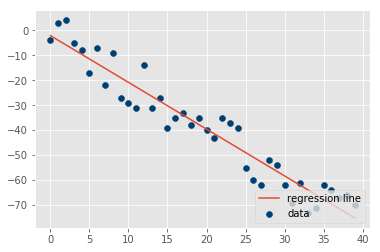

In [7]:
plt.scatter(x,y,color='#003F72', label = 'data')
plt.plot(x, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()